In [46]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import scipy.stats as stats
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.io as pio
pio.renderers.default = 'notebook'

# BASIC DATA EXPLORATION

1. import data
2. look at summary stats
3. evaluate nulls

In [74]:
df = pd.read_csv('../data/train.csv')

In [3]:
def create_scrollable_table(df, table_id=None, title=None):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflaw:auto;">'
    html += df.to_html()
    html += '</div>'
    return html

In [4]:
numerical_features = df.select_dtypes(include=[np.number])

numerical_features.describe().T

count           mean           std      min        25%  \
Id             1460.0     730.500000    421.610009      1.0     365.75   
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
Id                730.5    1095.25    1460.0  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
T

In [5]:
categorical_features = df.select_dtypes(include=[object])

categorical_features.describe().T

count unique      top  freq
MSZoning       1460      5       RL  1151
Street         1460      2     Pave  1454
Alley            91      2     Grvl    50
LotShape       1460      4      Reg   925
LandContour    1460      4      Lvl  1311
Utilities      1460      2   AllPub  1459
LotConfig      1460      5   Inside  1052
LandSlope      1460      3      Gtl  1382
Neighborhood   1460     25    NAmes   225
Condition1     1460      9     Norm  1260
Condition2     1460      8     Norm  1445
BldgType       1460      5     1Fam  1220
HouseStyle     1460      8   1Story   726
RoofStyle      1460      6    Gable  1141
RoofMatl       1460      8  CompShg  1434
Exterior1st    1460     15  VinylSd   515
Exterior2nd    1460     16  VinylSd   504
MasVnrType     1452      4     None   864
ExterQual      1460      4       TA   906
ExterCond      1460      5       TA  1282
Foundation     1460      6    PConc   647
BsmtQual       1423      4       TA   649
BsmtCond       1423      4       TA  1311
BsmtExposure   1422      4       No   953
BsmtFinType1   1423      6      Unf   430
BsmtFinType2   1422      6      Unf  1256
Heating        1460      6     GasA  1428
HeatingQC      1460      5       Ex   741
CentralAir     1460      2        Y  1365
Electrical     1459      5    SBrkr  1334
KitchenQual    1460      4       TA   735
Functional     1460      7      Typ  1360
FireplaceQu     770      5       Gd   380
GarageType     1379      6   Attchd   870
GarageFinish   1379      3      Unf   605
GarageQual     1379      5       TA  1311
GarageCond     1379      5       TA  1326
PavedDrive     1460      3        Y  1340
PoolQC            7      3       Gd     3
Fence           281      4    MnPrv   157
MiscFeature      54      4     Shed    49
SaleType       1460      9       WD  1267
SaleCondition  1460      6   Normal  1198

In [6]:
null_values = df.isnull().sum()
html_null_values = create_scrollable_table(null_values.to_frame(), 'null_values', 'Nulls sto dataset')

display(HTML(html_null_values))

In [7]:
missing_percentage = (null_values/len(df))*100
html_missing_percentage = create_scrollable_table(missing_percentage.to_frame(), 'missing_percentage', 'Pososto nulls sto dataset')

display(HTML(html_missing_percentage))

In [8]:
df[df.isnull().any(axis=1)]

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

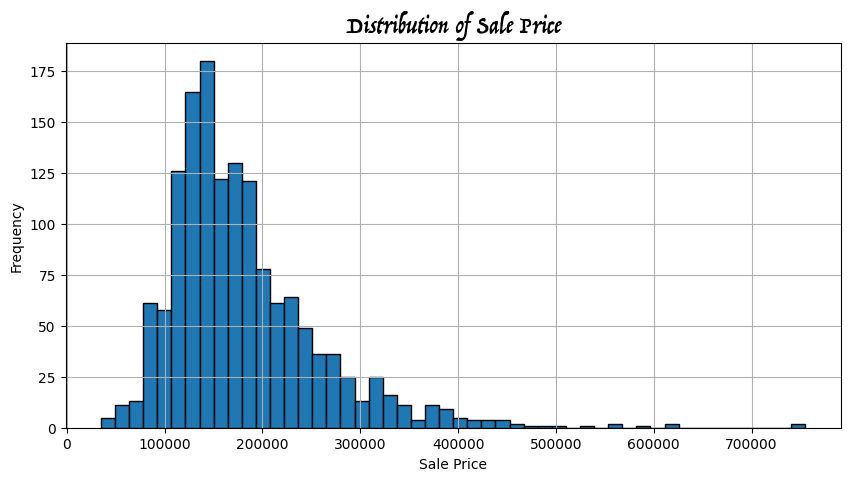

In [9]:
plt.figure(figsize=(10, 5))
plt.hist(df['SalePrice'], bins=50, edgecolor='k')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
title_font = {'family': 'Trattatello', 'size': 18}
plt.title('Distribution of Sale Price', fontdict=title_font)
plt.grid(True)
plt.show()

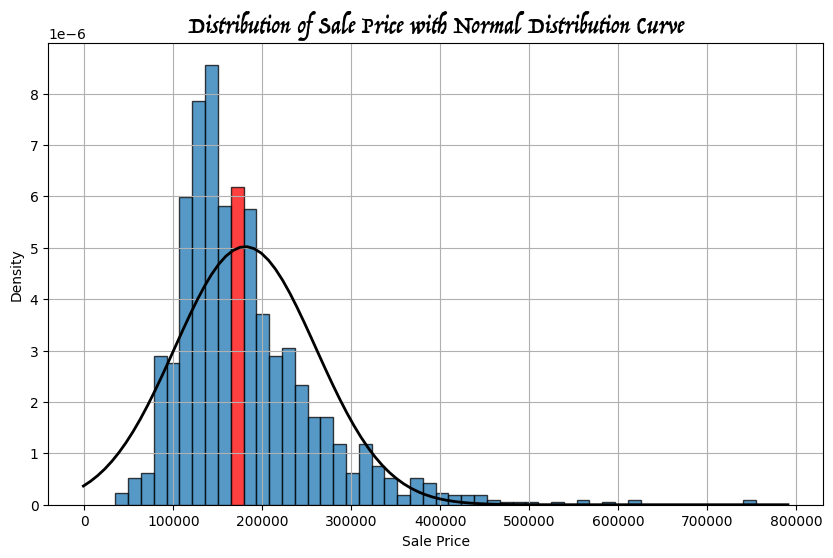

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Assuming you have a DataFrame named 'df' with a 'SalePrice' column
sale_prices = df['SalePrice']

# Calculate mean and standard deviation
mu, sigma = sale_prices.mean(), sale_prices.std()

# Create a histogram
plt.figure(figsize=(10, 6))
# tha borousa na mhn valw ta n,bins,patches.
# ta vazw an thelw na ta peiraksw meta px patches[1]
# patches einai h kathe mia sthlh
n, bins, patches = plt.hist(sale_prices, bins=50, density=True, alpha=0.75, edgecolor='k')

# make median patch red
median_bin = np.median(sale_prices)
median_bin_index = np.searchsorted(bins, median_bin)
patches[median_bin_index].set_facecolor('red')

# Plot the normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)

plt.xlabel('Sale Price')
plt.ylabel('Density')
plt.title('Distribution of Sale Price with Normal Distribution Curve', fontdict=title_font)
plt.grid(True)
plt.show()

#
# WHAT QUESTIONS I HAVE ABOUT DATA?

1. distribution of dwelling types and relation to sale prices
2. does zoning impact sales price?
3. street and alley access types?
4. What is the Average sale price by property shape?
5. Is there a Correlation between Property Age and Sale Price
6. Is there a Correlation between Living Area and Sale Price
7. Does price change year to year?

In [11]:
title_font = {'family': 'Trattatello', 'size': 18}

In [12]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Assuming you have a DataFrame named 'df' with the relevant data

# Count the occurrences of each building type
building_type_counts = df['BldgType'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = building_type_counts.plot(kind='bar', color='orange')
plt.xlabel('Building Type')
plt.ylabel('Count')
plt.title('Count of Each Building Type', fontdict=title_font)  # Set the title font
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the count on top of each bar
for i, count in enumerate(building_type_counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom')

# Display the plot
plt.tight_layout()
plt.show()


**2. does zoning impact sales price?**

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='MSZoning', y='SalePrice')
plt.xlabel('Zoning Classification')
plt.ylabel('Sale Price')
plt.title('Impact of Zoning on Sale Price', fontdict=title_font)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

**3. street and alley access types**

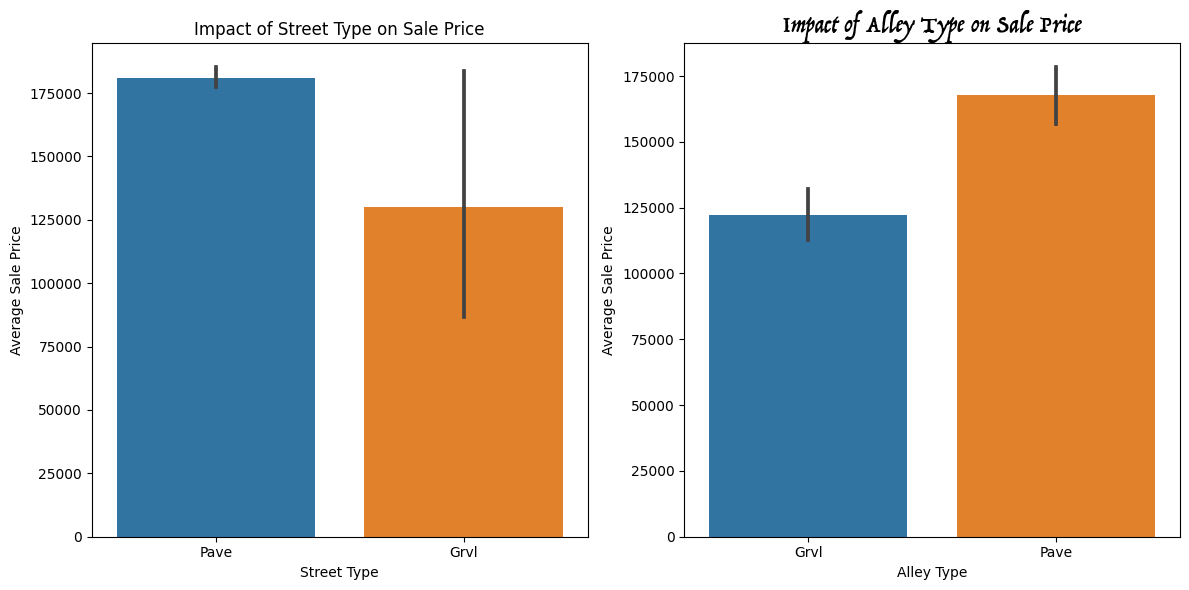

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Create a bar plot for street access
sns.barplot(data=df, x='Street', y='SalePrice', ax=axes[0])
axes[0].set_xlabel('Street Type')
axes[0].set_ylabel('Average Sale Price')
axes[0].set_title('Impact of Street Type on Sale Price')

# Create a bar plot for alley access
sns.barplot(data=df, x='Alley', y='SalePrice', ax=axes[1])
axes[1].set_xlabel('Alley Type')
axes[1].set_ylabel('Average Sale Price')
axes[1].set_title('Impact of Alley Type on Sale Price', fontdict=title_font)

# Adjust the space between subplots for better visibility
plt.tight_layout()

plt.show()

**4. What is the Average sale price by property shape?**

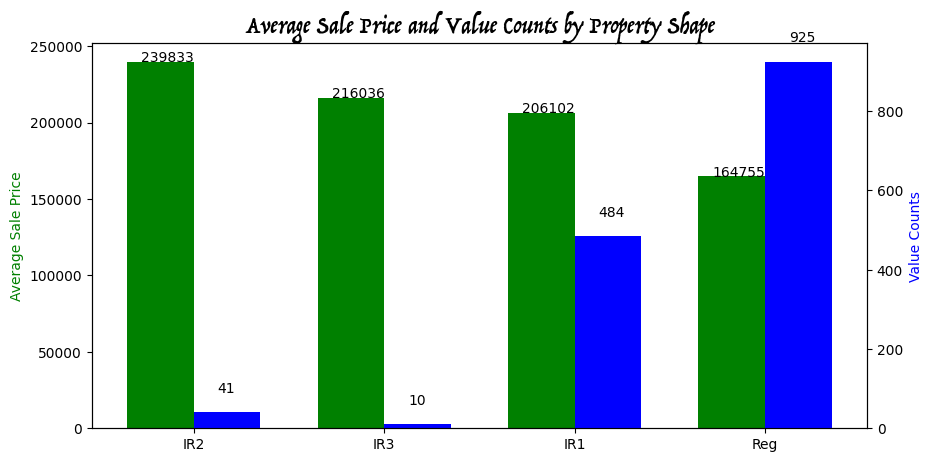

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

propertyshape_saleprice_average = df.groupby('LotShape')['SalePrice'].mean()
propertyshape_value_counts = df['LotShape'].value_counts()

# Sort the categories by average Sale Price
sorted_categories = propertyshape_saleprice_average.sort_values(ascending=False).index

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Create an array of x-positions for the bars
x = range(len(sorted_categories))

# Define the width of each bar
bar_width = 0.35

# Plot the average Sale Price
ax.bar(x, propertyshape_saleprice_average[sorted_categories], width=bar_width, label='Average Sale Price', color='green')

# Create a second y-axis on the right side
ax2 = ax.twinx()

# Plot the value counts
ax2.bar([i + bar_width for i in x], propertyshape_value_counts[sorted_categories], width=bar_width, label='Value Counts', color='blue')

# Set the x-axis labels and ticks
ax.set_xticks([i + bar_width / 2 for i in x])
ax.set_xticklabels(sorted_categories)

# Set labels for both y-axes
ax.set_ylabel('Average Sale Price', color='green')
ax2.set_ylabel('Value Counts', color='blue')

# Combine the legends
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
#ax.legend(lines + lines2, labels + labels2)

# Annotate the values over the bars
for i, v in enumerate(propertyshape_saleprice_average[sorted_categories]):
    ax.text(i - 0.1, v + 50, f"{v:.0f}", color='black')

for i, v in enumerate(propertyshape_value_counts[sorted_categories]):
    ax2.text(i + 0.3, v + 50, str(v), color='black')

plt.title('Average Sale Price and Value Counts by Property Shape', fontdict=title_font)
plt.show()

In [16]:
propertyshape_value_counts

Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

In [17]:
# Create a box plot
plt.figure(figsize=(12, 6))
ax = sns.boxplot(data=df, x='LotShape', y='SalePrice')
plt.xlabel('Property Shape')
plt.ylabel('Sale Price')
plt.title('Sale Price x Property Shape', fontdict=title_font)

# Calculate and plot the average (mean) values as points
means = df.groupby('LotShape')['SalePrice'].mean().reset_index()
sns.swarmplot(data=means, x='LotShape', y='SalePrice', color='red', size=10)

plt.show()

**5. Is there a Correlation between Property Age and Sale Price**

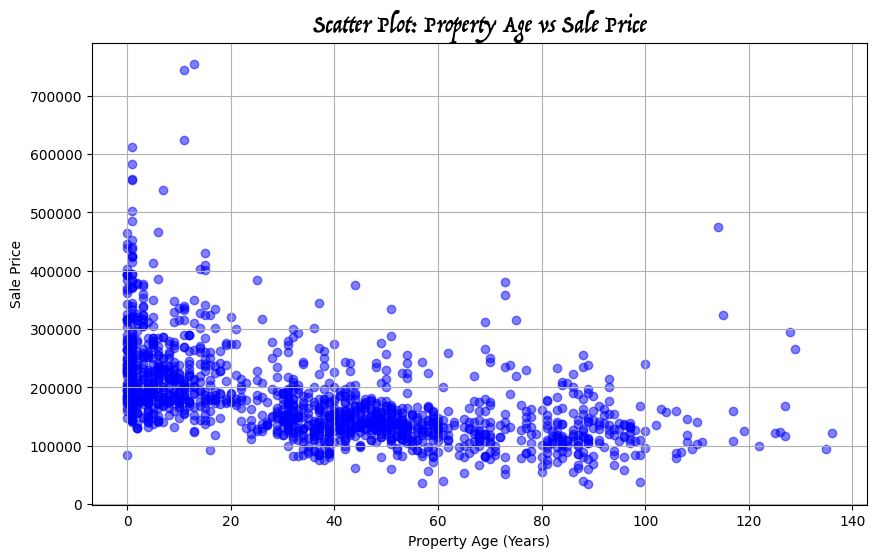

In [18]:
df['PropertyAge'] = df['YrSold'] - df['YearBuilt']

plt.figure(figsize=(10, 6))
plt.scatter(df['PropertyAge'], df['SalePrice'], alpha=0.5, color='blue')
plt.xlabel('Property Age (Years)')
plt.ylabel('Sale Price')
plt.title('Scatter Plot: Property Age vs Sale Price', fontdict=title_font)
plt.grid(True)

plt.show()

**correlation coefficient = pearson**

In [19]:
import pandas as pd

df['PropertyAge'] = df['YrSold'] - df['YearBuilt']

correlation = df['PropertyAge'].corr(df['SalePrice'])

# Provide an interpretation of the correlation scale
if correlation < -0.7:
    scale = "Strong Negative Correlation"
elif -0.7 <= correlation < -0.3:
    scale = "Moderate Negative Correlation"
elif -0.3 <= correlation < 0.3:
    scale = "Weak or No Correlation"
elif 0.3 <= correlation < 0.7:
    scale = "Moderate Positive Correlation"
else:
    scale = "Strong Positive Correlation"

print(f'Correlation between Property Age and Sale Price: {correlation:.2f} ({scale})')

Correlation between Property Age and Sale Price: -0.52 (Moderate Negative Correlation)


**average sale price by zoning**

In [20]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [47]:
import pandas as pd
import plotly.express as px

# Assuming you have a DataFrame df with columns MSZoning and SalePrice

# Calculate the average sale price for each zoning category
average_prices_by_zoning = df.groupby('MSZoning')['SalePrice'].mean().reset_index()

# Round the average sale prices
average_prices_by_zoning['SalePrice'] = average_prices_by_zoning['SalePrice'].round()

# Define a mapping for full explanations of zoning categories
zoning_mapping = {
    'A': 'Agriculture',
    'C': 'Commercial',
    'FV': 'Floating Village Residential',
    'I': 'Industrial',
    'RH': 'Residential High Density',
    'RL': 'Residential Low Density',
    'RP': 'Residential Low Density Park',
    'RM': 'Residential Medium Density'
}

# Map the zoning categories to full explanations
average_prices_by_zoning['MSZoning'] = average_prices_by_zoning['MSZoning'].map(zoning_mapping)

# Create the bar graph using Plotly
fig = px.bar(
    average_prices_by_zoning, 
    x='MSZoning', 
    y='SalePrice', 
    labels={'SalePrice': 'Average Sale Price'}, 
    text=average_prices_by_zoning['SalePrice']
)

# Add labels and title
fig.update_layout(
    xaxis_title="Zoning Class",
    yaxis_title="Average Sale Price",
    title="Average Sale Price by Zoning"
)

fig.update_traces(texttemplate='$%{text:,.0f}',textposition='outside')

# Show the plot
fig.show()

**sale price by street and alley access**

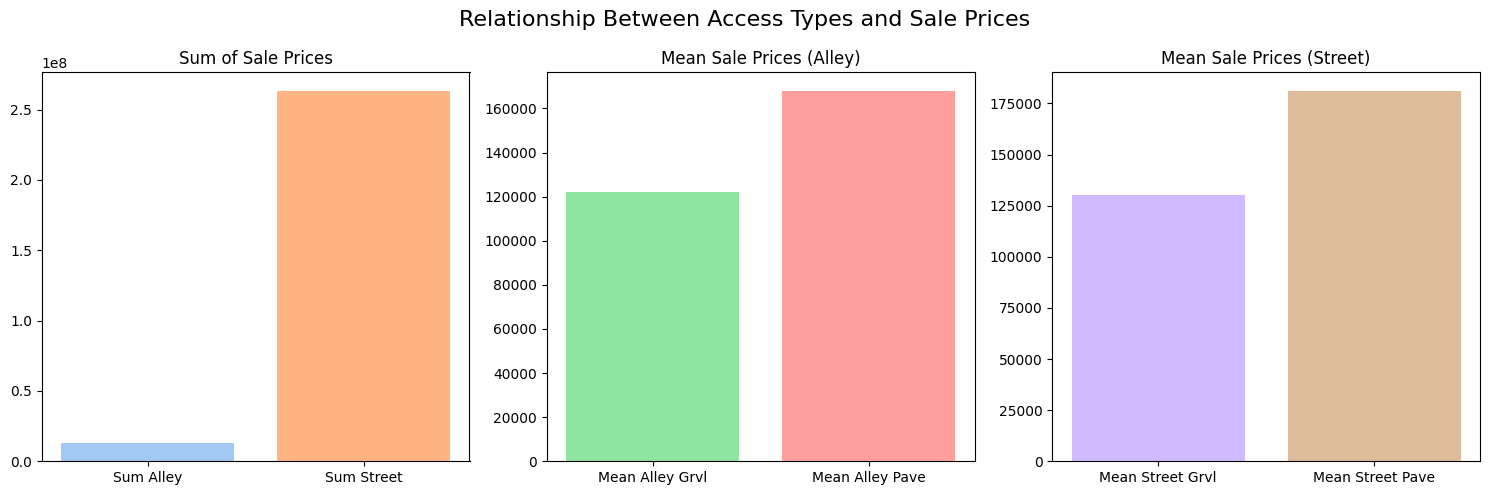

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for pastel color palette

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle("Relationship Between Access Types and Sale Prices", fontsize=16)

# Group the data by street and alley access types and calculate the mean sale price
access_grouped = df.groupby(['Street', 'Alley'])['SalePrice'].mean().unstack(fill_value=0)

# Calculate the sum of all values for each category (alley and street)
sum_alley = df['SalePrice'][df['Alley'].notna()].sum()
sum_street = df['SalePrice'][df['Street'] == 'Pave'].sum()

# Create a pastel color palette
pastel_colors = sns.color_palette("pastel")

# Bar plot for Street vs. Alley access
axes[0].bar(['Sum Alley', 'Sum Street'], [sum_alley, sum_street], color=pastel_colors[:2])
axes[0].set_title("Sum of Sale Prices")

# Calculate the mean sale price for each single value of Alley access
mean_alley_grvl = df['SalePrice'][df['Alley'] == 'Grvl'].mean()
mean_alley_pave = df['SalePrice'][df['Alley'] == 'Pave'].mean()

# Bar plot for Values of Alley access
axes[1].bar(['Mean Alley Grvl', 'Mean Alley Pave'], [mean_alley_grvl, mean_alley_pave], color=pastel_colors[2:4])
axes[1].set_title("Mean Sale Prices (Alley)")

# Calculate the mean sale price for each single value of Street access
mean_street_grvl = df['SalePrice'][df['Street'] == 'Grvl'].mean()
mean_street_pave = df['SalePrice'][df['Street'] == 'Pave'].mean()

# Bar plot for Values of Street access
axes[2].bar(['Mean Street Grvl', 'Mean Street Pave'], [mean_street_grvl, mean_street_pave], color=pastel_colors[4:6])
axes[2].set_title("Mean Sale Prices (Street)")

# Adjust spacing between subplots
plt.tight_layout()

plt.show()

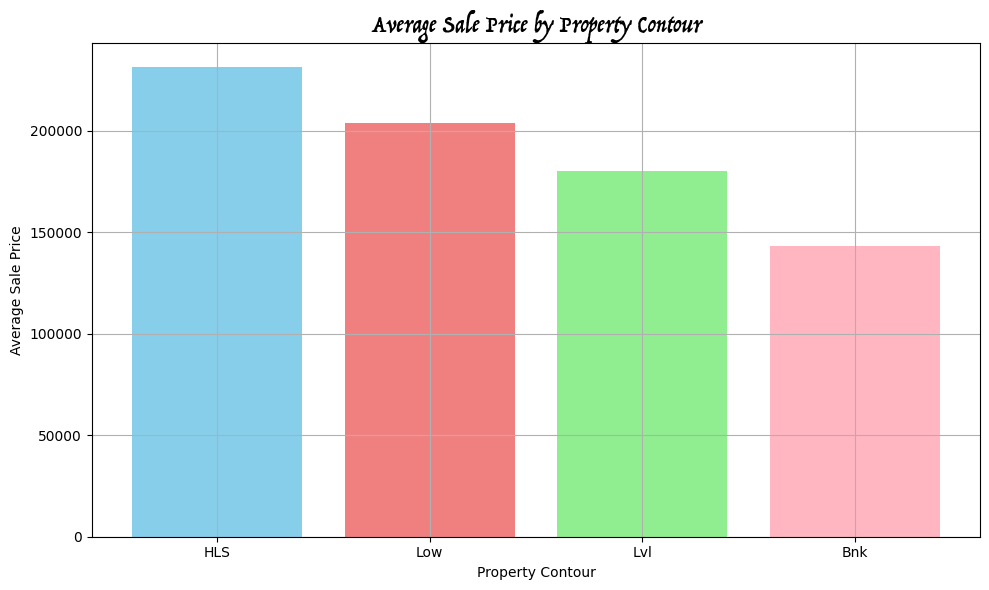

In [25]:
# Group the data by property contour and calculate the mean sale price
contour_grouped = df.groupby('LandContour')['SalePrice'].mean().sort_values(ascending=False)
colors = ['skyblue', 'lightcoral', 'lightgreen', 'lightpink']

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(contour_grouped.index, contour_grouped, color=colors)
plt.xlabel("Property Contour")
plt.ylabel("Average Sale Price")
plt.title("Average Sale Price by Property Contour", fontdict=title_font)
plt.tight_layout()
plt.grid(True)

plt.show()

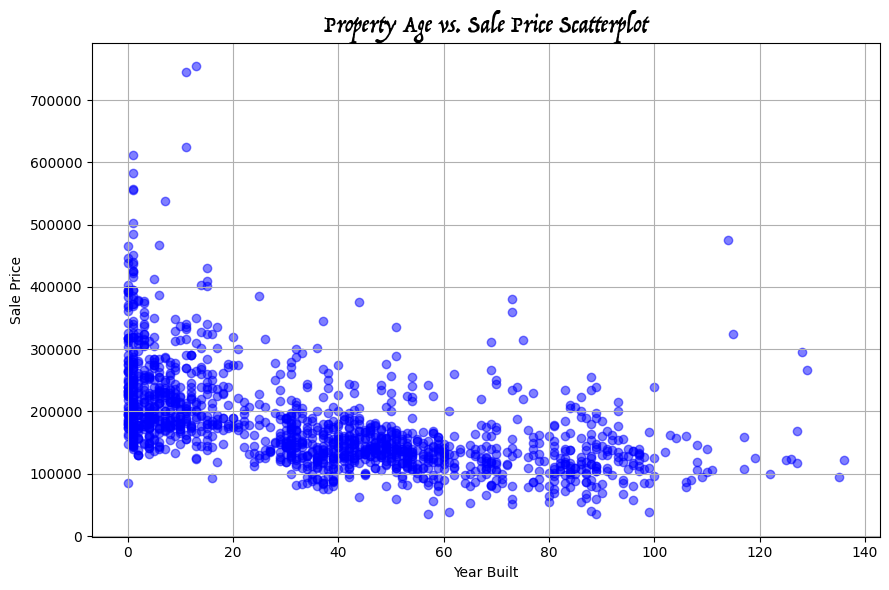

In [41]:
import matplotlib.pyplot as plt

# Create a scatterplot of property age (YearBuilt) vs. sale price
plt.figure(figsize=(9, 6))
plt.scatter(df['YrSold']-df['YearBuilt'], df['SalePrice'], alpha=0.5, color='blue')
plt.xlabel("Year Built")
plt.ylabel("Sale Price")
plt.title("Property Age vs. Sale Price Scatterplot", fontdict=title_font)
plt.grid(True)
plt.tight_layout()

plt.show()

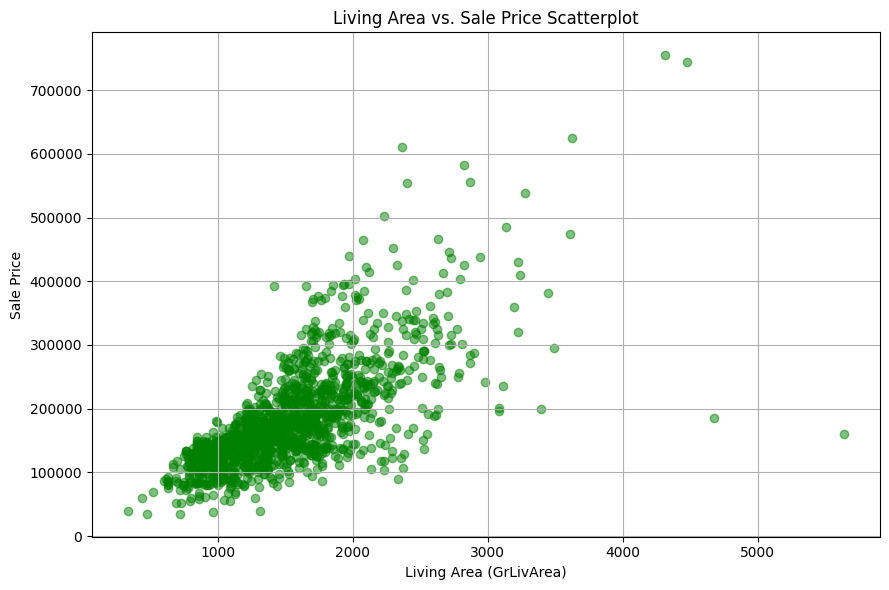

In [42]:
import matplotlib.pyplot as plt

# Create a scatterplot of living area (GrLivArea) vs. sale price (SalePrice)
plt.figure(figsize=(9, 6))
plt.scatter(df['GrLivArea'], df['SalePrice'], alpha=0.5, color='green')
plt.xlabel("Living Area (GrLivArea)")
plt.ylabel("Sale Price")
plt.title("Living Area vs. Sale Price Scatterplot")
plt.grid(True)
plt.tight_layout()

plt.show()

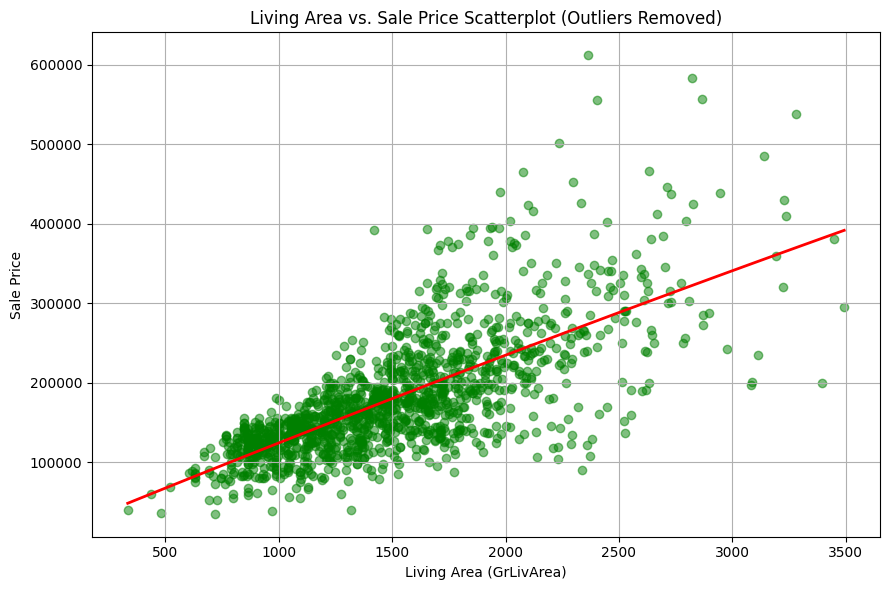

In [43]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Filter out outliers with living area over 3500 square feet
filtered_data = df[df['GrLivArea'] <= 3500]

# Create a scatterplot of living area (GrLivArea) vs. sale price (SalePrice) without outliers
plt.figure(figsize=(9, 6))
plt.scatter(filtered_data['GrLivArea'], filtered_data['SalePrice'], alpha=0.5, color='green')
plt.xlabel("Living Area (GrLivArea)")
plt.ylabel("Sale Price")
plt.title("Living Area vs. Sale Price Scatterplot (Outliers Removed)")

# Fit a quadratic (degree=2) polynomial regression curve to the filtered data
X = filtered_data['GrLivArea'].values.reshape(-1, 1)
y = filtered_data['SalePrice']

degree = 2  # Quadratic curve
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

regression = LinearRegression()
regression.fit(X_poly, y)

# Create a range of x values for the curve
x_range = np.linspace(X.min(), X.max(), 100)
x_range_poly = poly_features.transform(x_range.reshape(-1, 1))

# Predict the y values for the curve
y_pred = regression.predict(x_range_poly)

# Plot the quadratic polynomial regression curve
plt.plot(x_range, y_pred, color='red', linewidth=2)

plt.grid(True)
plt.tight_layout()

plt.show()

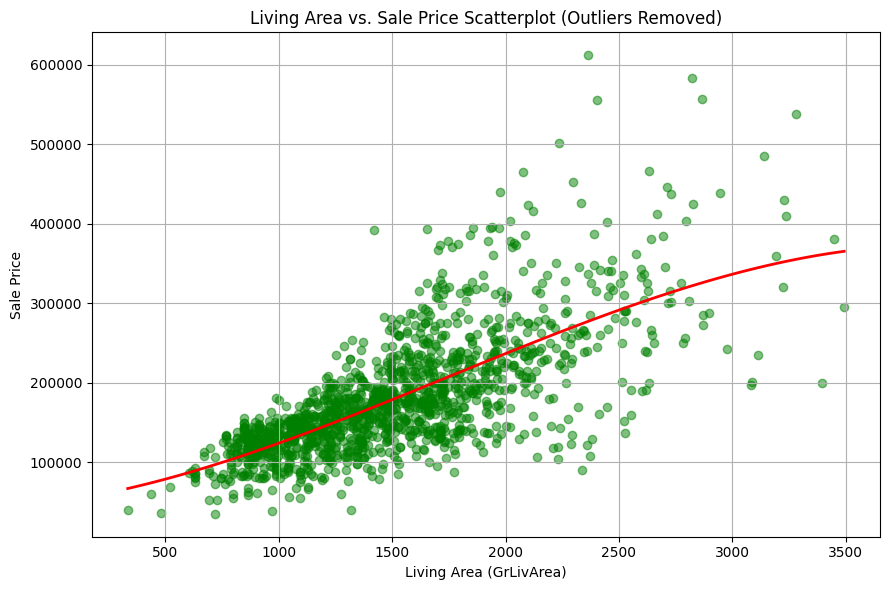

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Filter out outliers with living area over 3500 square feet
filtered_data = df[df['GrLivArea'] <= 3500]

# Create a scatterplot of living area (GrLivArea) vs. sale price (SalePrice) without outliers
plt.figure(figsize=(9, 6))
plt.scatter(filtered_data['GrLivArea'], filtered_data['SalePrice'], alpha=0.5, color='green')
plt.xlabel("Living Area (GrLivArea)")
plt.ylabel("Sale Price")
plt.title("Living Area vs. Sale Price Scatterplot (Outliers Removed)")

# Fit a cubic (degree=3) polynomial regression curve to the filtered data
X = filtered_data['GrLivArea'].values.reshape(-1, 1)
y = filtered_data['SalePrice']

degree = 3  # Cubic curve
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

regression = LinearRegression()
regression.fit(X_poly, y)

# Create a range of x values for the curve
x_range = np.linspace(X.min(), X.max(), 100)
x_range_poly = poly_features.transform(x_range.reshape(-1, 1))

# Predict the y values for the curve
y_pred = regression.predict(x_range_poly)

# Plot the cubic polynomial regression curve
plt.plot(x_range, y_pred, color='red', linewidth=2)

plt.grid(True)
plt.tight_layout()

plt.show()

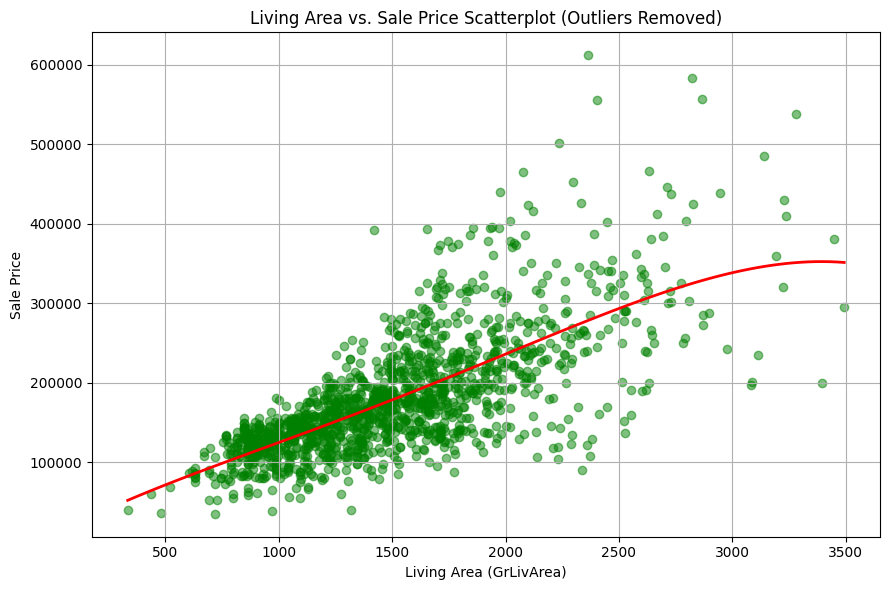

In [48]:
plt.figure(figsize=(9, 6))
plt.scatter(filtered_data['GrLivArea'], filtered_data['SalePrice'], alpha=0.5, color='green')
plt.xlabel("Living Area (GrLivArea)")
plt.ylabel("Sale Price")
plt.title("Living Area vs. Sale Price Scatterplot (Outliers Removed)")

# Fit a higher-degree (degree=4) polynomial regression curve to the filtered data
X = filtered_data['GrLivArea'].values.reshape(-1, 1)
y = filtered_data['SalePrice']

degree = 4  # Higher-degree curve
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

regression = LinearRegression()
regression.fit(X_poly, y)

# Create a range of x values for the curve
x_range = np.linspace(X.min(), X.max(), 100)
x_range_poly = poly_features.transform(x_range.reshape(-1, 1))

# Predict the y values for the curve
y_pred = regression.predict(x_range_poly)

# Plot the higher-degree polynomial regression curve
plt.plot(x_range, y_pred, color='red', linewidth=2)

plt.grid(True)
plt.tight_layout()

plt.show()

In [71]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

# Calculate the averages and years
averages = df.groupby('YrSold')['SalePrice'].mean()
years = sorted(df['YrSold'].unique())

fig = px.box(df, x='YrSold', y='SalePrice', points="all")

fig.update_traces(marker=dict(size=5, opacity=0.5))

# Add average numbers as annotations on top of each box
annotations = [dict(x=year, y=avg, text=f'{avg:.0f}', showarrow=False, font=dict(color='black')) for year, avg in zip(years, averages)]

fig.update_layout(
    title="Sale Price Trend Over the Years Sold",
    xaxis_title="Year Sold",
    yaxis_title="Sale Price",
    showlegend=False,
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(color="black"),
    annotations=annotations
)

# Add connecting lines between averages
line_shapes = [dict(type='line', x0=years[i], x1=years[i + 1], y0=averages[years[i]], y1=averages[years[i + 1]], line=dict(color='darkred', width=2)) for i in range(len(years) - 1)]

fig.update_layout(shapes=line_shapes)

fig.show()

/var/folders/0x/_40_0jwn08g9gpwysnc6kv6r0000gn/T/ipykernel_99721/1149572674.py:8: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



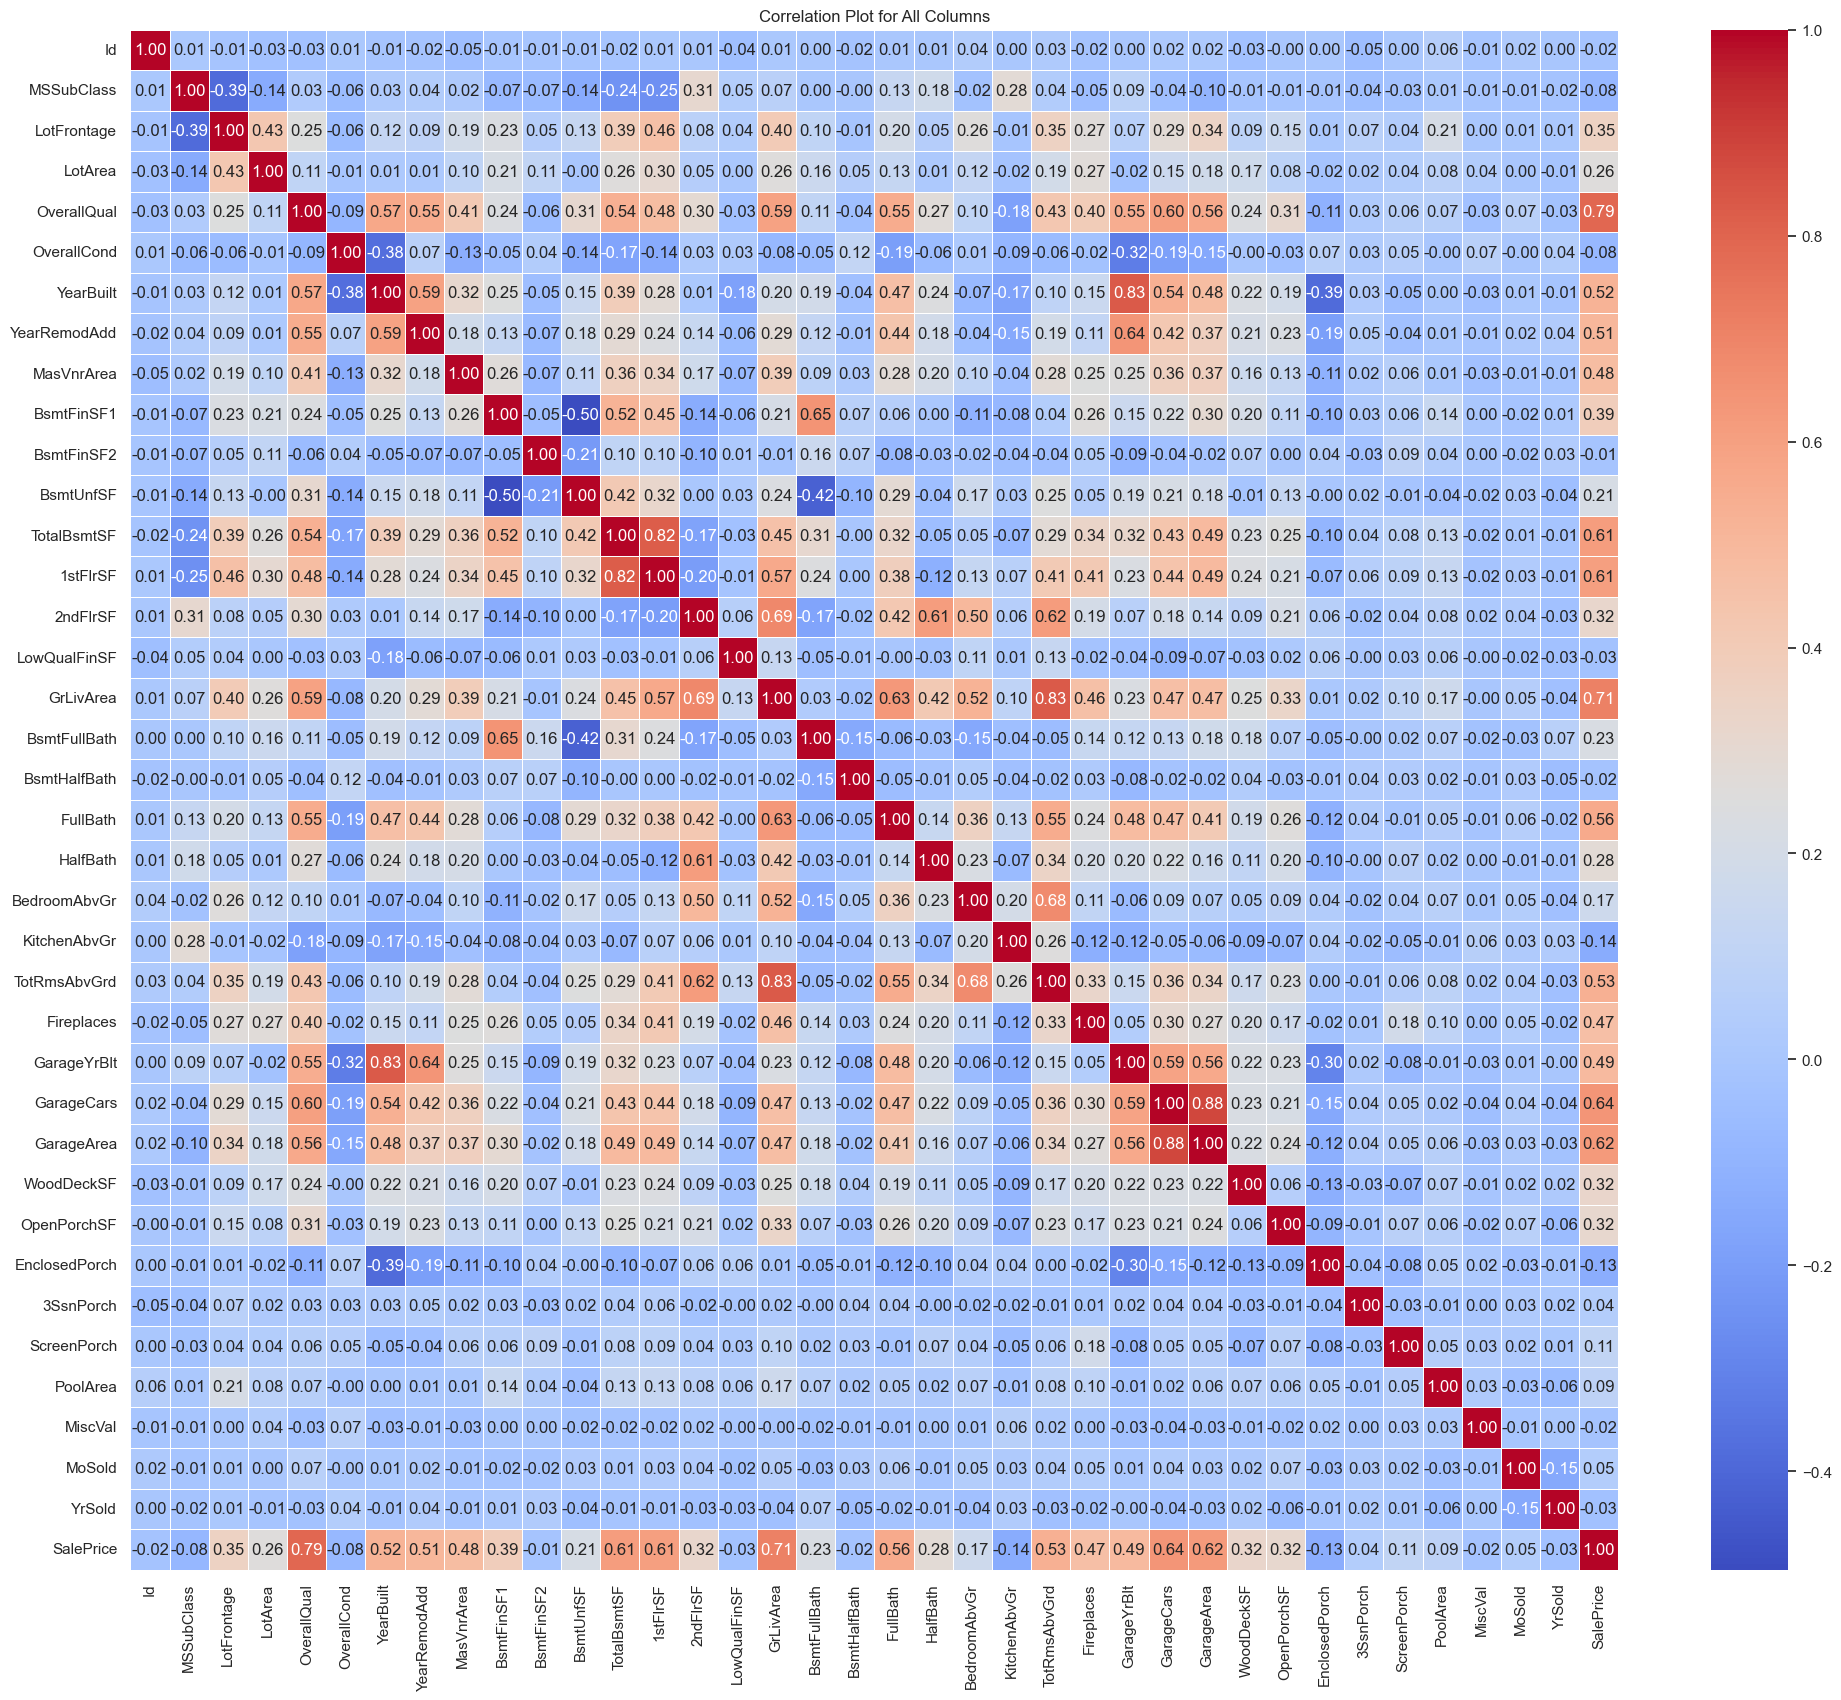

In [78]:
# Calculate the correlation matrix for all columns
correlation_matrix = df.corr()

# Create the correlation plot
plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Plot for All Columns")

plt.savefig('../plots/correlation_plot.png')

plt.show()